<a href="https://colab.research.google.com/github/fedraameneiro/DataScientistFinalProject/blob/main/Proyecto_Ameneiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Proyecto

Analizaremos la cantidad de población en EEUU que consume alcohol por rango de edad y año.

Nuestro dataset representa el abuso de sustancias (cigarrillos, marihuana, cocaina y alcohol) en los diferentes rangos de edad y estados. Los datos fueron recolectados de manera individual en cada estado como parte de un estudio de parte del NSDUH. Los datos registran información entre 2002 y 2018. Ambos datos (total y ratios) fueron dados según el porcentaje de la población total de cada estado.


**Glosario**: State: El estado donde el reporte fue creado Year: Año en el que el reporte fue creado Population.12-17: Población estimada en ese grupo de edad. Obtenido del censo de US realizado en ese año en ese estado. Total.Alcohol.Use Disorder Past Year: Numero de personas ( en cientos) que han consumido alcohol de forma desmesurada en el pasado año en el rango de edad indicado. Rates.Alcohol.Use Disorder Past Year: Porcentaje de la población que han consumido alcohol de forma desmesurada en el pasado año en el rango de edad indicado. Total.Alcohol.Use Past Month: Numero estimado de personas (en cientos)han consumido alcohol de forma desmesurada en el pasado mes en el rango de edad indicado. Rates.Alcohol.Use Disorder Past Month: Porcentaje de la población que han consumido alcohol de forma desmesurada en el pasado mes en el rango de edad indicado. Total.Tobacco.Cigarrete Past Month: Numero de personas (en cientos )estimado que uso cigarrillos en el ultimo mes en el rango de edad indicado. Rates.Tobacco Cigarrete PAst Month: Porcentaje de la población que ha usado cigarrillos en el pasado mes en el rango de edad indicado. Total.Tobaco.Use Past Month: Numero de personas (en cientos) que han usado productos derivados del tabaco ( como cigarrillos, tabaco masticable, pipas...)en el ultimo mes en el rango de edad indicado. Total.Illicit Drugs.Cocaine Used PAst Year: Estimación de las personas (en cientos) que han consumido cocaina en el pasado año en el rango de edad indicado. Rates. Illicit Drugs.Cocaine Used PAst Year: Porcentaje de la población que han usado cocaina en el pasado año en el rango de edad indicado. Total.Marijuana New Users: Numero total de personas estimadas (en cientos) que han empezado a consumir marihuana en el pasado año en el rango de edad indicado. Rates.Marijuana.New Users: Porcentaje de la población que empezaron a usar marihuana en el pasado año en el rango de edad indicado. Total.Marijuana.Used Past Month: Numero de personas estimadas(en cientos) que han usado marihuana en el pasado mes en el rango de edad indicado. Rates.Marijuana.Used Past Month: Porcentaje de personas que usaron marihuana el pasado mes en el rango de edad indicado. Total.Marijuana.Used Past Year: Numero de personas estimadas (en cientos) que se estima usaron marihuana en el pasado año en el rango de edad indicado. Rates.Marijuana.Used Past Year: Porcentaje de la población que usaron marihuana en el pasado año en el rango de edad indicado

#Analisis general de los datos

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from mlxtend.feature_selection import SequentialFeatureSelector as SFS


In [ ]:
#obtener el archivo csv de drive

!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

link = 'https://drive.google.com/file/d/1UuGovKChP7A27wDjc7DRFLhmAOU8ZEay/view?usp=sharing'

# to get the id part of the file
id = link.split("/")[-2]

downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('drugsAbuse.csv')


In [ ]:
df=pd.read_csv('drugsAbuse.csv', sep=';')
df.head()

,State,Year,Population.12-17,Population.18-25,Population.26+,Totals.Alcohol.Use Disorder Past Year.12-17,Totals.Alcohol.Use Disorder Past Year.18-25,Totals.Alcohol.Use Disorder Past Year.26+,"Rates,Alcohol,Use Disorder Past Year,12-17","Rates,Alcohol,Use Disorder Past Year,18-25",...,Totals.Marijuana.Used Past Year.26+,"Rates,Marijuana,Used Past Year,12-17","Rates,Marijuana,Used Past Year,18-25","Rates,Marijuana,Used Past Year,26+",Totals.Tobacco.Use Past Month.12-17,Totals.Tobacco.Use Past Month.18-25,Totals.Tobacco.Use Past Month.26+,"Rates,Tobacco,Use Past Month,12-17","Rates,Tobacco,Use Past Month,18-25","Rates,Tobacco,Use Past Month,26+"
0,Alabama,2002,380805,499453,2812905,18,68,138,"0,048336","0,13649",...,141,"0,127535","0,23788","0,050275",63,226,930,"0,166578","0,451976","0,330659"
1,Alaska,2002,69400,62791,368460,4,12,27,"0,061479","0,187891",...,46,"0,18873","0,389026","0,124566",11,30,112,"0,163918","0,48427","0,30422"
2,Arizona,2002,485521,602265,3329482,36,117,258,"0,073819","0,193626",...,215,"0,169646","0,275435","0,06464",73,240,1032,"0,151071","0,397968","0,309969"
3,Arkansas,2002,232986,302029,1687337,14,53,101,"0,061457","0,175913",...,104,"0,157567","0,288856","0,06151",46,169,660,"0,195714","0,558846","0,39121"
4,California,2002,3140739,3919577,21392421,173,581,1298,"0,055109","0,148312",...,1670,"0,141067","0,282887","0,078068",290,1377,4721,"0,092235","0,351353","0,220699"


In [ ]:
df.dtypes


State                                                object
Year                                                  int64
Population.12-17                                      int64
Population.18-25                                      int64
Population.26+                                        int64
Totals.Alcohol.Use Disorder Past Year.12-17           int64
Totals.Alcohol.Use Disorder Past Year.18-25           int64
Totals.Alcohol.Use Disorder Past Year.26+             int64
Rates,Alcohol,Use Disorder Past Year,12-17           object
Rates,Alcohol,Use Disorder Past Year,18-25           object
Rates,Alcohol,Use Disorder Past Year,26+             object
Totals.Alcohol.Use Past Month.12-17                   int64
Totals.Alcohol.Use Past Month.18-25                   int64
Totals.Alcohol.Use Past Month.26+                     int64
Rates,Alcohol,Use Past Month,12-17                   object
Rates,Alcohol,Use Past Month,18-25                   object
Rates,Alcohol,Use Past Month,26+        

#Normalización
Normalizamos la base de datos. Determinamos si tiene nulos, espacios en blanco que queramos eliminar:

En este caso no tenemos nada que eliminar, afortunadamente.

In [ ]:
df.isnull().sum()/df.shape[0]

State                                                0.0
Year                                                 0.0
Population.12-17                                     0.0
Population.18-25                                     0.0
Population.26+                                       0.0
Totals.Alcohol.Use Disorder Past Year.12-17          0.0
Totals.Alcohol.Use Disorder Past Year.18-25          0.0
Totals.Alcohol.Use Disorder Past Year.26+            0.0
Rates,Alcohol,Use Disorder Past Year,12-17           0.0
Rates,Alcohol,Use Disorder Past Year,18-25           0.0
Rates,Alcohol,Use Disorder Past Year,26+             0.0
Totals.Alcohol.Use Past Month.12-17                  0.0
Totals.Alcohol.Use Past Month.18-25                  0.0
Totals.Alcohol.Use Past Month.26+                    0.0
Rates,Alcohol,Use Past Month,12-17                   0.0
Rates,Alcohol,Use Past Month,18-25                   0.0
Rates,Alcohol,Use Past Month,26+                     0.0
Totals.Tobacco.Cigarette Past M

localizamos los valores NaN que nos puedan molestar

No tenemos.

In [ ]:
df.isna().sum()


State                                                0
Year                                                 0
Population.12-17                                     0
Population.18-25                                     0
Population.26+                                       0
Totals.Alcohol.Use Disorder Past Year.12-17          0
Totals.Alcohol.Use Disorder Past Year.18-25          0
Totals.Alcohol.Use Disorder Past Year.26+            0
Rates,Alcohol,Use Disorder Past Year,12-17           0
Rates,Alcohol,Use Disorder Past Year,18-25           0
Rates,Alcohol,Use Disorder Past Year,26+             0
Totals.Alcohol.Use Past Month.12-17                  0
Totals.Alcohol.Use Past Month.18-25                  0
Totals.Alcohol.Use Past Month.26+                    0
Rates,Alcohol,Use Past Month,12-17                   0
Rates,Alcohol,Use Past Month,18-25                   0
Rates,Alcohol,Use Past Month,26+                     0
Totals.Tobacco.Cigarette Past Month.12-17            0
Totals.Tob

Normalizamos la base de datos. Determinamos si tiene nulos, espacios en blanco que queramos eliminar:

En este caso no tenemos nada que eliminar, afortunadamente.

In [ ]:
df.isnull().sum()/df.shape[0]

State                                                0.0
Year                                                 0.0
Population.12-17                                     0.0
Population.18-25                                     0.0
Population.26+                                       0.0
Totals.Alcohol.Use Disorder Past Year.12-17          0.0
Totals.Alcohol.Use Disorder Past Year.18-25          0.0
Totals.Alcohol.Use Disorder Past Year.26+            0.0
Rates,Alcohol,Use Disorder Past Year,12-17           0.0
Rates,Alcohol,Use Disorder Past Year,18-25           0.0
Rates,Alcohol,Use Disorder Past Year,26+             0.0
Totals.Alcohol.Use Past Month.12-17                  0.0
Totals.Alcohol.Use Past Month.18-25                  0.0
Totals.Alcohol.Use Past Month.26+                    0.0
Rates,Alcohol,Use Past Month,12-17                   0.0
Rates,Alcohol,Use Past Month,18-25                   0.0
Rates,Alcohol,Use Past Month,26+                     0.0
Totals.Tobacco.Cigarette Past M

Localizamos los valores NaN que nos puedan molestar

No tenemos.

In [ ]:
df.isna().sum()


State                                                0
Year                                                 0
Population.12-17                                     0
Population.18-25                                     0
Population.26+                                       0
Totals.Alcohol.Use Disorder Past Year.12-17          0
Totals.Alcohol.Use Disorder Past Year.18-25          0
Totals.Alcohol.Use Disorder Past Year.26+            0
Rates,Alcohol,Use Disorder Past Year,12-17           0
Rates,Alcohol,Use Disorder Past Year,18-25           0
Rates,Alcohol,Use Disorder Past Year,26+             0
Totals.Alcohol.Use Past Month.12-17                  0
Totals.Alcohol.Use Past Month.18-25                  0
Totals.Alcohol.Use Past Month.26+                    0
Rates,Alcohol,Use Past Month,12-17                   0
Rates,Alcohol,Use Past Month,18-25                   0
Rates,Alcohol,Use Past Month,26+                     0
Totals.Tobacco.Cigarette Past Month.12-17            0
Totals.Tob

#Analisis general

vemos que la fecha es tipo entero y tenemos mucha informacion, como los ratios, tipo objeto.

Con el histograma podemos ver que por año por ciudad lo más común es encontrarse entre 0 y 30 casos. Habiendo situaciones extraordinarias con 175 casos.

<Axes: >

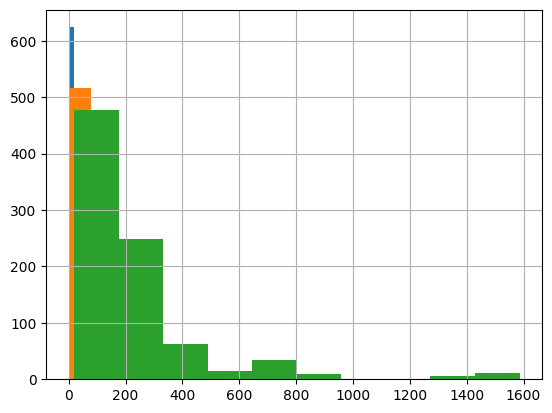

In [ ]:
df['Totals.Alcohol.Use Disorder Past Year.12-17'].hist()
df['Totals.Alcohol.Use Disorder Past Year.18-25'].hist()
df['Totals.Alcohol.Use Disorder Past Year.26+'].hist()


In [ ]:
df=pd.read_csv('drugsAbuse.csv', sep=';')
df.head()

,State,Year,Population.12-17,Population.18-25,Population.26+,Totals.Alcohol.Use Disorder Past Year.12-17,Totals.Alcohol.Use Disorder Past Year.18-25,Totals.Alcohol.Use Disorder Past Year.26+,"Rates,Alcohol,Use Disorder Past Year,12-17","Rates,Alcohol,Use Disorder Past Year,18-25",...,Totals.Marijuana.Used Past Year.26+,"Rates,Marijuana,Used Past Year,12-17","Rates,Marijuana,Used Past Year,18-25","Rates,Marijuana,Used Past Year,26+",Totals.Tobacco.Use Past Month.12-17,Totals.Tobacco.Use Past Month.18-25,Totals.Tobacco.Use Past Month.26+,"Rates,Tobacco,Use Past Month,12-17","Rates,Tobacco,Use Past Month,18-25","Rates,Tobacco,Use Past Month,26+"
0,Alabama,2002,380805,499453,2812905,18,68,138,"0,048336","0,13649",...,141,"0,127535","0,23788","0,050275",63,226,930,"0,166578","0,451976","0,330659"
1,Alaska,2002,69400,62791,368460,4,12,27,"0,061479","0,187891",...,46,"0,18873","0,389026","0,124566",11,30,112,"0,163918","0,48427","0,30422"
2,Arizona,2002,485521,602265,3329482,36,117,258,"0,073819","0,193626",...,215,"0,169646","0,275435","0,06464",73,240,1032,"0,151071","0,397968","0,309969"
3,Arkansas,2002,232986,302029,1687337,14,53,101,"0,061457","0,175913",...,104,"0,157567","0,288856","0,06151",46,169,660,"0,195714","0,558846","0,39121"
4,California,2002,3140739,3919577,21392421,173,581,1298,"0,055109","0,148312",...,1670,"0,141067","0,282887","0,078068",290,1377,4721,"0,092235","0,351353","0,220699"


Hago uso de formateo de graficas con plt para que me muestre los años en el eje x como quiero

<BarContainer object of 867 artists>

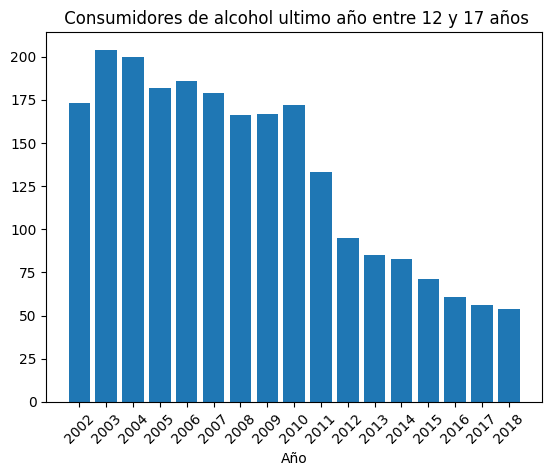

In [ ]:
plt.title(' Consumidores de alcohol ultimo año entre 12 y 17 años')
plt.xlabel('Año')
anios=np.arange(2002,2019,1)
plt.xticks(anios, rotation=45)
plt.bar(x=df.Year,height=df['Totals.Alcohol.Use Disorder Past Year.12-17'])

Podemos ver que la cantidad de consumidores de alcohol en el último año en el rango de edad entre los 12 y los 17 años ha ido bajando a lo largo de los años, siendo el pico de mayor consumo 2003. Un dato muy favorable debido a la campaña de educación que se ha dado en todos los Estados Unidos.

<BarContainer object of 867 artists>

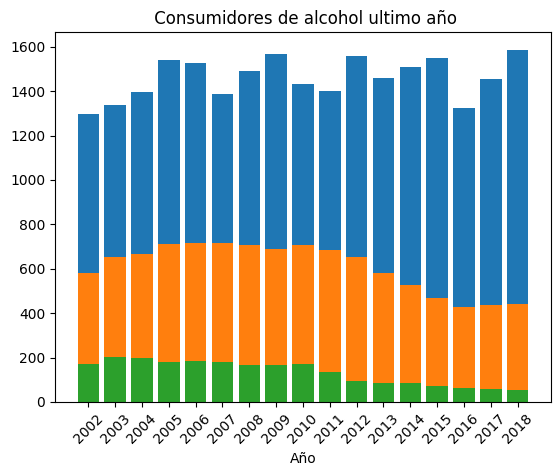

In [ ]:
plt.title(' Consumidores de alcohol ultimo año')
plt.xlabel('Año')
anios=np.arange(2002,2019,1)
plt.xticks(anios, rotation=45)
plt.bar(x=df.Year,height=df['Totals.Alcohol.Use Disorder Past Year.26+'])
plt.bar(x=df.Year,height=df['Totals.Alcohol.Use Disorder Past Year.18-25'])
plt.bar(x=df.Year,height=df['Totals.Alcohol.Use Disorder Past Year.12-17'])

Si realizamos una perspectiva en el mismo período de consumidores de alcohol en el último año según rango de edad, vemos que mientras los consumidores menores han ido bajando su consumo, al igual que los adultos entre 18 y 25 años, los mayores de 26 años han mantenido el consumo de forma estable a lo largo del tiempo.

Vamos a observar los casos por Estado

Text(0.5, 0, 'Estado')

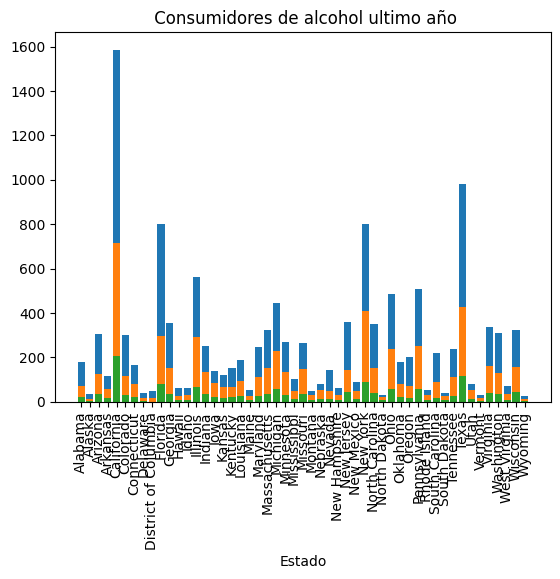

In [ ]:
plt.bar(x=df.State,height=df['Totals.Alcohol.Use Disorder Past Year.26+'])
plt.bar(x=df.State,height=df['Totals.Alcohol.Use Disorder Past Year.18-25'])
plt.bar(x=df.State,height=df['Totals.Alcohol.Use Disorder Past Year.12-17'])
plt.xticks(rotation='vertical')
plt.title(' Consumidores de alcohol ultimo año')
plt.xlabel('Estado')


El estado con mas casos ha sido California, vamos a revisar la evolucion de los casos a lo largo de los años, en el estado de California

In [ ]:
df_California=df.groupby('State').get_group('California')

<BarContainer object of 17 artists>

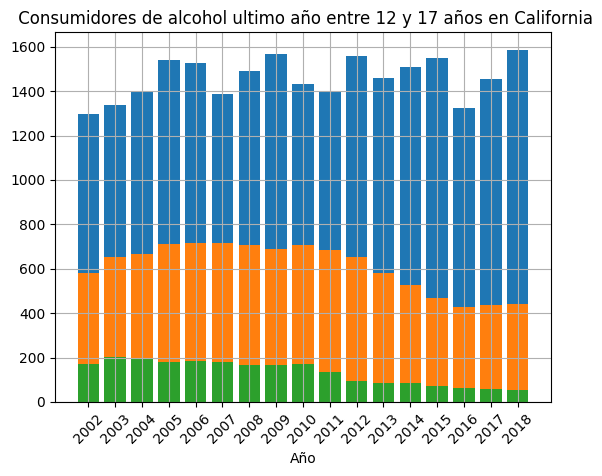

In [ ]:
plt.xticks(rotation='vertical')
anios=np.arange(2002,2019,1)
plt.xticks(anios, rotation=45)
plt.title(' Consumidores de alcohol ultimo año entre 12 y 17 años en California')
plt.xlabel('Año')
plt.grid(True)
plt.bar(x=df_California.Year,height=df_California['Totals.Alcohol.Use Disorder Past Year.26+'])
plt.bar(x=df_California.Year,height=df_California['Totals.Alcohol.Use Disorder Past Year.18-25'])
plt.bar(x=df_California.Year,height=df_California['Totals.Alcohol.Use Disorder Past Year.12-17'])

Resultó muy sencillo detectar el estado con más casos con la gráfica, pero resulta mas dificil ver el estado con menos casos. Vamos a calcularlo.

In [ ]:
#obtenemos la suma de consumidores entre 12 y 17 años en el último año por pais.
lista_State=df.groupby('State')['Totals.Alcohol.Use Disorder Past Year.12-17'].sum()

In [ ]:
#obtenemos el estado con menos casos de la lista, en nuestro caso es District of Columbia
lista_State.min()

16

In [ ]:
lista_State

State
Alabama                  227
Alaska                    44
Arizona                  393
Arkansas                 160
California              2267
Colorado                 322
Connecticut              215
Delaware                  40
District of Columbia      16
Florida                  868
Georgia                  425
Hawaii                    69
Idaho                    106
Illinois                 701
Indiana                  355
Iowa                     196
Kansas                   180
Kentucky                 205
Louisiana                226
Maine                     67
Maryland                 275
Massachusetts            363
Michigan                 569
Minnesota                318
Mississippi              128
Missouri                 348
Montana                   80
Nebraska                 120
Nevada                   161
New Hampshire             82
New Jersey               456
New Mexico               137
New York                 982
North Carolina           416
North Da

Comparamos los datos de California con los de Distrito de Columbia

In [ ]:
df.head()

,State,Year,Population.12-17,Population.18-25,Population.26+,Totals.Alcohol.Use Disorder Past Year.12-17,Totals.Alcohol.Use Disorder Past Year.18-25,Totals.Alcohol.Use Disorder Past Year.26+,"Rates,Alcohol,Use Disorder Past Year,12-17","Rates,Alcohol,Use Disorder Past Year,18-25",...,Totals.Marijuana.Used Past Year.26+,"Rates,Marijuana,Used Past Year,12-17","Rates,Marijuana,Used Past Year,18-25","Rates,Marijuana,Used Past Year,26+",Totals.Tobacco.Use Past Month.12-17,Totals.Tobacco.Use Past Month.18-25,Totals.Tobacco.Use Past Month.26+,"Rates,Tobacco,Use Past Month,12-17","Rates,Tobacco,Use Past Month,18-25","Rates,Tobacco,Use Past Month,26+"
0,Alabama,2002,380805,499453,2812905,18,68,138,"0,048336","0,13649",...,141,"0,127535","0,23788","0,050275",63,226,930,"0,166578","0,451976","0,330659"
1,Alaska,2002,69400,62791,368460,4,12,27,"0,061479","0,187891",...,46,"0,18873","0,389026","0,124566",11,30,112,"0,163918","0,48427","0,30422"
2,Arizona,2002,485521,602265,3329482,36,117,258,"0,073819","0,193626",...,215,"0,169646","0,275435","0,06464",73,240,1032,"0,151071","0,397968","0,309969"
3,Arkansas,2002,232986,302029,1687337,14,53,101,"0,061457","0,175913",...,104,"0,157567","0,288856","0,06151",46,169,660,"0,195714","0,558846","0,39121"
4,California,2002,3140739,3919577,21392421,173,581,1298,"0,055109","0,148312",...,1670,"0,141067","0,282887","0,078068",290,1377,4721,"0,092235","0,351353","0,220699"


In [ ]:
df_ColumbiaCalifornia=df[(df.State=='California')|(df.State=='District of Columbia')]
df_ColumbiaCalifornia

,State,Year,Population.12-17,Population.18-25,Population.26+,Totals.Alcohol.Use Disorder Past Year.12-17,Totals.Alcohol.Use Disorder Past Year.18-25,Totals.Alcohol.Use Disorder Past Year.26+,"Rates,Alcohol,Use Disorder Past Year,12-17","Rates,Alcohol,Use Disorder Past Year,18-25",...,Totals.Marijuana.Used Past Year.26+,"Rates,Marijuana,Used Past Year,12-17","Rates,Marijuana,Used Past Year,18-25","Rates,Marijuana,Used Past Year,26+",Totals.Tobacco.Use Past Month.12-17,Totals.Tobacco.Use Past Month.18-25,Totals.Tobacco.Use Past Month.26+,"Rates,Tobacco,Use Past Month,12-17","Rates,Tobacco,Use Past Month,18-25","Rates,Tobacco,Use Past Month,26+"
4,California,2002,3140739,3919577,21392421,173,581,1298,"0,055109","0,148312",...,1670,"0,141067","0,282887","0,078068",290,1377,4721,"0,092235","0,351353","0,220699"
8,District of Columbia,2002,33192,73655,372907,1,12,31,"0,029961","0,162639",...,40,"0,148342","0,376138","0,106759",3,28,109,"0,095288","0,373867","0,293435"
55,California,2003,3209345,3949889,21686129,204,655,1336,"0,063632","0,165861",...,1625,"0,146025","0,278214","0,074923",349,1380,4238,"0,10876","0,349357","0,195433"
59,District of Columbia,2003,33384,70483,367787,1,11,33,"0,034653","0,161876",...,39,"0,132777","0,308746","0,105871",3,25,106,"0,089747","0,35706","0,288755"
106,California,2004,3290671,3974135,21850567,200,665,1395,"0,060806","0,167423",...,1762,"0,139219","0,277279","0,08063",358,1353,4459,"0,108731","0,340423","0,204054"
110,District of Columbia,2004,34350,65197,364207,1,12,32,"0,039544","0,186946",...,41,"0,143749","0,338518","0,113864",3,26,103,"0,093329","0,392593","0,282272"
157,California,2005,3293484,4085207,22046720,182,710,1539,"0,055341","0,173875",...,1736,"0,132474","0,284125","0,078748",313,1402,4944,"0,094911","0,343297","0,224262"
161,District of Columbia,2005,36509,71305,369695,1,14,32,"0,035282","0,200386",...,41,"0,133269","0,370049","0,110363",3,28,106,"0,093525","0,393764","0,286784"
208,California,2006,3251070,4216574,22275311,186,717,1526,"0,057343","0,170077",...,1726,"0,130271","0,279859","0,07748",286,1417,5099,"0,08812","0,336126","0,228918"
212,District of Columbia,2006,37965,82030,377906,1,16,32,"0,0359","0,196714",...,42,"0,129952","0,372018","0,11034",4,31,108,"0,092782","0,382499","0,285659"


Text(0.5, 0, 'Año')

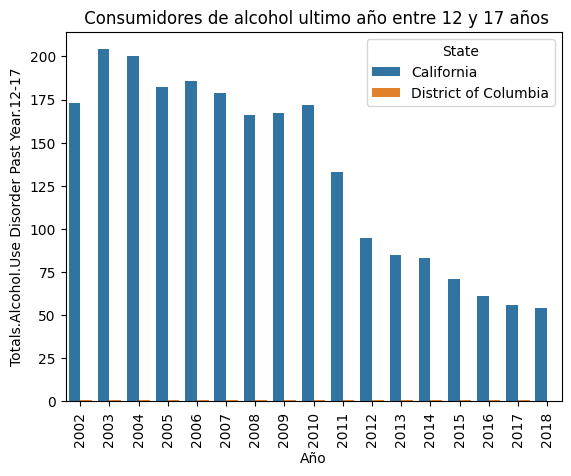

In [ ]:
import seaborn as sns

sns.barplot(x=df_ColumbiaCalifornia.Year,y=df_ColumbiaCalifornia['Totals.Alcohol.Use Disorder Past Year.12-17'], hue=df_ColumbiaCalifornia.State)
plt.xticks(rotation='vertical')
plt.title(' Consumidores de alcohol ultimo año entre 12 y 17 años')
plt.xlabel('Año')


La diferencia es abrumadora.

Para poder ver las dimensiones más precisas, voy a dividir el data set en población, cantidad de personas que consumieron en el ultimo año tabaco, y cantidad de personas que lo consumieron el ultimo mes según el rango de edad y vamos a estudiar su correlación.

In [ ]:
df.dtypes

State                                                object
Year                                                  int64
Population.12-17                                      int64
Population.18-25                                      int64
Population.26+                                        int64
Totals.Alcohol.Use Disorder Past Year.12-17           int64
Totals.Alcohol.Use Disorder Past Year.18-25           int64
Totals.Alcohol.Use Disorder Past Year.26+             int64
Rates,Alcohol,Use Disorder Past Year,12-17           object
Rates,Alcohol,Use Disorder Past Year,18-25           object
Rates,Alcohol,Use Disorder Past Year,26+             object
Totals.Alcohol.Use Past Month.12-17                   int64
Totals.Alcohol.Use Past Month.18-25                   int64
Totals.Alcohol.Use Past Month.26+                     int64
Rates,Alcohol,Use Past Month,12-17                   object
Rates,Alcohol,Use Past Month,18-25                   object
Rates,Alcohol,Use Past Month,26+        

In [ ]:
df.corr(numeric_only=True)

,Year,Population.12-17,Population.18-25,Population.26+,Totals.Alcohol.Use Disorder Past Year.12-17,Totals.Alcohol.Use Disorder Past Year.18-25,Totals.Alcohol.Use Disorder Past Year.26+,Totals.Alcohol.Use Past Month.12-17,Totals.Alcohol.Use Past Month.18-25,Totals.Alcohol.Use Past Month.26+,...,Totals.Marijuana.New Users.26+,Totals.Marijuana.Used Past Month.12-17,Totals.Marijuana.Used Past Month.18-25,Totals.Marijuana.Used Past Month.26+,Totals.Marijuana.Used Past Year.12-17,Totals.Marijuana.Used Past Year.18-25,Totals.Marijuana.Used Past Year.26+,Totals.Tobacco.Use Past Month.12-17,Totals.Tobacco.Use Past Month.18-25,Totals.Tobacco.Use Past Month.26+
Year,1.000000,-0.002989,0.024011,0.049844,-0.295648,-0.145498,-0.009302,-0.190306,-0.001909,0.061586,...,0.341547,-0.026593,0.106379,0.247006,-0.041012,0.085337,0.223397,-0.337903,-0.126499,-0.024480
Population.12-17,-0.002989,1.000000,0.996437,0.989139,0.883319,0.962375,0.983464,0.952414,0.989306,0.978387,...,0.719034,0.978677,0.948973,0.844258,0.985392,0.964547,0.876240,0.853579,0.962583,0.964174
Population.18-25,0.024011,0.996437,1.000000,0.993519,0.862205,0.957943,0.987366,0.939338,0.994358,0.985059,...,0.742460,0.980676,0.966064,0.868544,0.984879,0.978683,0.898141,0.828904,0.955587,0.959935
Population.26+,0.049844,0.989139,0.993519,1.000000,0.834850,0.939306,0.985849,0.924899,0.988285,0.995148,...,0.770148,0.973941,0.971719,0.890853,0.977374,0.982212,0.918694,0.810874,0.943315,0.966377
Totals.Alcohol.Use Disorder Past Year.12-17,-0.295648,0.883319,0.862205,0.834850,1.000000,0.956590,0.880583,0.971156,0.876831,0.824890,...,0.400983,0.889556,0.772450,0.589722,0.902458,0.798658,0.632699,0.959308,0.929370,0.855155
Totals.Alcohol.Use Disorder Past Year.18-25,-0.145498,0.962375,0.957943,0.939306,0.956590,1.000000,0.967853,0.983868,0.971103,0.935021,...,0.578980,0.964367,0.903989,0.752013,0.972324,0.922944,0.789060,0.922018,0.977418,0.933795
Totals.Alcohol.Use Disorder Past Year.26+,-0.009302,0.983464,0.987366,0.985849,0.880583,0.967853,1.000000,0.947256,0.990167,0.984603,...,0.727453,0.982327,0.965491,0.870193,0.986144,0.976915,0.898516,0.841994,0.953211,0.952404
Totals.Alcohol.Use Past Month.12-17,-0.190306,0.952414,0.939338,0.924899,0.971156,0.983868,0.947256,1.000000,0.951616,0.919502,...,0.541916,0.949150,0.869588,0.710795,0.959195,0.891517,0.751370,0.950310,0.975104,0.935528
Totals.Alcohol.Use Past Month.18-25,-0.001909,0.989306,0.994358,0.988285,0.876831,0.971103,0.990167,0.951616,1.000000,0.986981,...,0.715615,0.981766,0.965662,0.855261,0.984989,0.978643,0.886178,0.847663,0.966717,0.962222
Totals.Alcohol.Use Past Month.26+,0.061586,0.978387,0.985059,0.995148,0.824890,0.935021,0.984603,0.919502,0.986981,1.000000,...,0.773526,0.970689,0.975847,0.898876,0.972285,0.985077,0.925541,0.796456,0.933765,0.956589


Para poder usar estos campos debemos previamente convertir los string en entero, y para eso, debemos convertir as ',' en '.'

In [ ]:
df['Rates,Alcohol,Use Disorder Past Year,12-17']=df['Rates,Alcohol,Use Disorder Past Year,12-17'].str.replace(',','.')
df['Rates,Alcohol,Use Disorder Past Year,18-25']=df['Rates,Alcohol,Use Disorder Past Year,18-25'].str.replace(',','.')
df['Rates,Alcohol,Use Disorder Past Year,26+']=df['Rates,Alcohol,Use Disorder Past Year,26+'].str.replace(',','.')



In [ ]:
df.head()

,State,Year,Population.12-17,Population.18-25,Population.26+,Totals.Alcohol.Use Disorder Past Year.12-17,Totals.Alcohol.Use Disorder Past Year.18-25,Totals.Alcohol.Use Disorder Past Year.26+,"Rates,Alcohol,Use Disorder Past Year,12-17","Rates,Alcohol,Use Disorder Past Year,18-25",...,Totals.Marijuana.Used Past Year.26+,"Rates,Marijuana,Used Past Year,12-17","Rates,Marijuana,Used Past Year,18-25","Rates,Marijuana,Used Past Year,26+",Totals.Tobacco.Use Past Month.12-17,Totals.Tobacco.Use Past Month.18-25,Totals.Tobacco.Use Past Month.26+,"Rates,Tobacco,Use Past Month,12-17","Rates,Tobacco,Use Past Month,18-25","Rates,Tobacco,Use Past Month,26+"
0,Alabama,2002,380805,499453,2812905,18,68,138,0.048336,0.13649,...,141,"0,127535","0,23788","0,050275",63,226,930,"0,166578","0,451976","0,330659"
1,Alaska,2002,69400,62791,368460,4,12,27,0.061479,0.187891,...,46,"0,18873","0,389026","0,124566",11,30,112,"0,163918","0,48427","0,30422"
2,Arizona,2002,485521,602265,3329482,36,117,258,0.073819,0.193626,...,215,"0,169646","0,275435","0,06464",73,240,1032,"0,151071","0,397968","0,309969"
3,Arkansas,2002,232986,302029,1687337,14,53,101,0.061457,0.175913,...,104,"0,157567","0,288856","0,06151",46,169,660,"0,195714","0,558846","0,39121"
4,California,2002,3140739,3919577,21392421,173,581,1298,0.055109,0.148312,...,1670,"0,141067","0,282887","0,078068",290,1377,4721,"0,092235","0,351353","0,220699"


In [ ]:
df['Rates,Alcohol,Use Disorder Past Year,12-17']=df['Rates,Alcohol,Use Disorder Past Year,12-17'].astype(float)
df['Rates,Alcohol,Use Disorder Past Year,18-25']=df['Rates,Alcohol,Use Disorder Past Year,18-25'].astype(float)
df['Rates,Alcohol,Use Disorder Past Year,26+']=df['Rates,Alcohol,Use Disorder Past Year,26+'].astype(float)

In [ ]:
df.dtypes

State                                                 object
Year                                                   int64
Population.12-17                                       int64
Population.18-25                                       int64
Population.26+                                         int64
Totals.Alcohol.Use Disorder Past Year.12-17            int64
Totals.Alcohol.Use Disorder Past Year.18-25            int64
Totals.Alcohol.Use Disorder Past Year.26+              int64
Rates,Alcohol,Use Disorder Past Year,12-17           float64
Rates,Alcohol,Use Disorder Past Year,18-25           float64
Rates,Alcohol,Use Disorder Past Year,26+             float64
Totals.Alcohol.Use Past Month.12-17                    int64
Totals.Alcohol.Use Past Month.18-25                    int64
Totals.Alcohol.Use Past Month.26+                      int64
Rates,Alcohol,Use Past Month,12-17                    object
Rates,Alcohol,Use Past Month,18-25                    object
Rates,Alcohol,Use Past M

In [ ]:
medias=[df['Rates,Alcohol,Use Disorder Past Year,12-17'].mean(),df['Rates,Alcohol,Use Disorder Past Year,18-25'].mean(),df['Rates,Alcohol,Use Disorder Past Year,26+'].mean()]
nombres=['Rates,Alcohol,Use Disorder Past Year,12-17','Rates,Alcohol,Use Disorder Past Year,18-25','Rates,Alcohol,Use Disorder Past Year,26+']

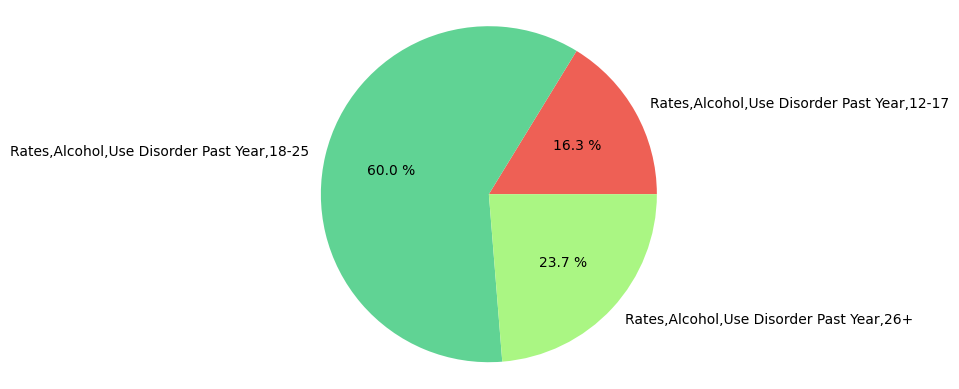

In [ ]:
colores = ["#EE6055","#60D394","#AAF683","#FFD97D","#FF9B85"]
plt.pie(medias, labels=nombres, autopct="%0.1f %%", colors=colores)
plt.axis("equal")
plt.show()

En esta gráfica podemos ver que el rango de edad de consumidores habituales de alcohol se encuentra en los mayores de edad entre 18 y 25 años.

In [ ]:
df['Rates,Alcohol,Use Past Month,26+']=df['Rates,Alcohol,Use Past Month,26+'].str.replace(',','.')
df['Rates,Alcohol,Use Past Month,18-25']=df['Rates,Alcohol,Use Past Month,18-25'].str.replace(',','.')
df['Rates,Alcohol,Use Past Month,12-17']=df['Rates,Alcohol,Use Past Month,12-17'].str.replace(',','.')



In [ ]:
df['Rates,Alcohol,Use Past Month,12-17']=df['Rates,Alcohol,Use Past Month,12-17'].astype(float)
df['Rates,Alcohol,Use Past Month,18-25']=df['Rates,Alcohol,Use Past Month,18-25'].astype(float)
df['Rates,Alcohol,Use Past Month,26+']=df['Rates,Alcohol,Use Past Month,26+'].astype(float)

In [ ]:
medias=[df['Rates,Alcohol,Use Past Month,12-17'].mean(),df['Rates,Alcohol,Use Past Month,18-25'].mean(),df['Rates,Alcohol,Use Past Month,26+'].mean()]
nombres=['Rates,Alcohol,Use Past Month,12-177','Rates,Alcohol,Use Past Month,18-25','Rates,Alcohol,Use Past Month,26+']

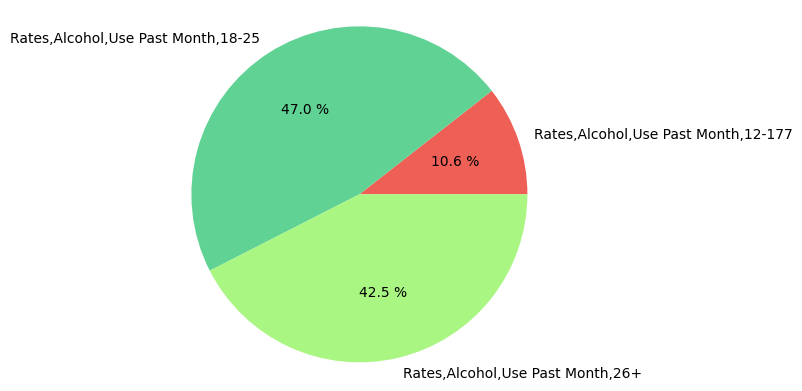

In [ ]:
plt.pie(medias, labels=nombres, autopct="%0.1f %%", colors=colores)
plt.axis("equal")
plt.show()

Podemos ver que el ratio por mes en la franja de edad mas joven aumenta en el consumo de alcohol en el último mes pero aumenta en los mayores de 26 años

Revisamos ahora los datos por pais

In [ ]:
#quito el año para que no le afecte a la media de los datos
df_sinanio=df.drop('Year',axis=1)
df_sinanio

,State,Population.12-17,Population.18-25,Population.26+,Totals.Alcohol.Use Disorder Past Year.12-17,Totals.Alcohol.Use Disorder Past Year.18-25,Totals.Alcohol.Use Disorder Past Year.26+,"Rates,Alcohol,Use Disorder Past Year,12-17","Rates,Alcohol,Use Disorder Past Year,18-25","Rates,Alcohol,Use Disorder Past Year,26+",...,Totals.Marijuana.Used Past Year.26+,"Rates,Marijuana,Used Past Year,12-17","Rates,Marijuana,Used Past Year,18-25","Rates,Marijuana,Used Past Year,26+",Totals.Tobacco.Use Past Month.12-17,Totals.Tobacco.Use Past Month.18-25,Totals.Tobacco.Use Past Month.26+,"Rates,Tobacco,Use Past Month,12-17","Rates,Tobacco,Use Past Month,18-25","Rates,Tobacco,Use Past Month,26+"
0,Alabama,380805,499453,2812905,18,68,138,0.048336,0.136490,0.049068,...,141,"0,127535","0,23788","0,050275",63,226,930,"0,166578","0,451976","0,330659"
1,Alaska,69400,62791,368460,4,12,27,0.061479,0.187891,0.073677,...,46,"0,18873","0,389026","0,124566",11,30,112,"0,163918","0,48427","0,30422"
2,Arizona,485521,602265,3329482,36,117,258,0.073819,0.193626,0.077521,...,215,"0,169646","0,275435","0,06464",73,240,1032,"0,151071","0,397968","0,309969"
3,Arkansas,232986,302029,1687337,14,53,101,0.061457,0.175913,0.059810,...,104,"0,157567","0,288856","0,06151",46,169,660,"0,195714","0,558846","0,39121"
4,California,3140739,3919577,21392421,173,581,1298,0.055109,0.148312,0.060692,...,1670,"0,141067","0,282887","0,078068",290,1377,4721,"0,092235","0,351353","0,220699"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862,Virginia,629725,869285,5581639,10,82,267,0.015199,0.094035,0.047823,...,518,"0,096489","0,329603","0,092889",28,266,1234,"0,045116","0,305545","0,22115"
863,Washington,545968,738052,5065742,11,75,282,0.020069,0.101770,0.055612,...,1199,"0,163818","0,454971","0,236665",20,163,1150,"0,037481","0,220519","0,22704"
864,West Virginia,124659,174236,1235448,2,15,46,0.017428,0.087561,0.037304,...,144,"0,121996","0,330921","0,116328",10,70,438,"0,081434","0,400053","0,35469"
865,Wisconsin,442510,615930,3861670,8,74,217,0.018720,0.120776,0.056299,...,466,"0,120078","0,326326","0,120566",17,157,917,"0,038051","0,254571","0,237359"


In [ ]:
df_pais=df_sinanio.groupby('State').mean()
df_pais

<ipython-input-42-bca2c101c039>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_pais=df_sinanio.groupby('State').mean()


,Population.12-17,Population.18-25,Population.26+,Totals.Alcohol.Use Disorder Past Year.12-17,Totals.Alcohol.Use Disorder Past Year.18-25,Totals.Alcohol.Use Disorder Past Year.26+,"Rates,Alcohol,Use Disorder Past Year,12-17","Rates,Alcohol,Use Disorder Past Year,18-25","Rates,Alcohol,Use Disorder Past Year,26+",Totals.Alcohol.Use Past Month.12-17,...,Totals.Marijuana.New Users.26+,Totals.Marijuana.Used Past Month.12-17,Totals.Marijuana.Used Past Month.18-25,Totals.Marijuana.Used Past Month.26+,Totals.Marijuana.Used Past Year.12-17,Totals.Marijuana.Used Past Year.18-25,Totals.Marijuana.Used Past Year.26+,Totals.Tobacco.Use Past Month.12-17,Totals.Tobacco.Use Past Month.18-25,Totals.Tobacco.Use Past Month.26+
State,,,,,,,,,,,,,,,,,,,,,
Alabama,3.804562e+05,5.155061e+05,3.028919e+06,13.352941,59.411765,148.705882,0.034972,0.115566,0.049222,45.529412,...,3.529412,21.823529,74.294118,118.882353,41.294118,125.647059,208.529412,44.117647,218.352941,986.823529
Alaska,6.197176e+04,7.627335e+04,4.169269e+05,2.588235,11.352941,27.764706,0.041093,0.148891,0.066484,8.000000,...,0.705882,5.823529,18.117647,44.352941,10.411765,28.352941,65.705882,7.411765,32.176471,123.117647
Arizona,5.344429e+05,6.982230e+05,4.056229e+06,23.117647,102.352941,254.000000,0.043951,0.148500,0.063483,71.000000,...,7.058824,39.470588,120.470588,231.647059,75.352941,199.352941,368.411765,47.941176,244.882353,1017.588235
Arkansas,2.346599e+05,3.097943e+05,1.834733e+06,9.411765,40.588235,94.705882,0.040018,0.132029,0.051802,30.235294,...,1.941176,15.235294,47.823529,88.411765,29.352941,81.823529,145.823529,29.470588,136.176471,637.823529
California,3.139175e+06,4.258846e+06,2.351141e+07,133.352941,609.705882,1459.705882,0.042097,0.143550,0.062248,405.411765,...,40.705882,246.705882,862.823529,1619.882353,453.941176,1384.941176,2530.470588,220.117647,1246.176471,4563.411765
Colorado,4.016328e+05,5.487115e+05,3.250852e+06,18.941176,96.058824,231.941176,0.047774,0.177179,0.071451,62.176471,...,6.000000,39.411765,148.764706,323.235294,71.529412,225.000000,482.823529,42.941176,225.058824,828.235294
Connecticut,2.875490e+05,3.662410e+05,2.329164e+06,12.647059,60.764706,146.588235,0.043506,0.167865,0.062993,47.352941,...,3.647059,24.058824,89.058824,140.352941,45.882353,145.705882,229.411765,27.470588,140.352941,542.941176
Delaware,6.873888e+04,9.525400e+04,5.850456e+05,2.352941,14.117647,33.352941,0.036048,0.148299,0.057208,9.235294,...,0.764706,5.529412,20.764706,32.941176,10.294118,34.235294,54.176471,6.941176,36.941176,159.764706
District of Columbia,3.314106e+04,8.563947e+04,4.117835e+05,0.941176,13.764706,37.000000,0.028485,0.163132,0.089741,4.294118,...,0.764706,2.705882,21.647059,36.941176,5.176471,35.411765,64.352941,2.294118,28.529412,107.764706


Vamos a manejarnos con los paises con mayor cantidad de bebedores entre 12 y 17 años


In [ ]:
# Ordena la lista en orden descendente
df_pais = df_pais.sort_values('Totals.Alcohol.Use Disorder Past Year.12-17', ascending=False)
df_pais

,Population.12-17,Population.18-25,Population.26+,Totals.Alcohol.Use Disorder Past Year.12-17,Totals.Alcohol.Use Disorder Past Year.18-25,Totals.Alcohol.Use Disorder Past Year.26+,"Rates,Alcohol,Use Disorder Past Year,12-17","Rates,Alcohol,Use Disorder Past Year,18-25","Rates,Alcohol,Use Disorder Past Year,26+",Totals.Alcohol.Use Past Month.12-17,...,Totals.Marijuana.New Users.26+,Totals.Marijuana.Used Past Month.12-17,Totals.Marijuana.Used Past Month.18-25,Totals.Marijuana.Used Past Month.26+,Totals.Marijuana.Used Past Year.12-17,Totals.Marijuana.Used Past Year.18-25,Totals.Marijuana.Used Past Year.26+,Totals.Tobacco.Use Past Month.12-17,Totals.Tobacco.Use Past Month.18-25,Totals.Tobacco.Use Past Month.26+
State,,,,,,,,,,,,,,,,,,,,,
California,3.139175e+06,4.258846e+06,2.351141e+07,133.352941,609.705882,1459.705882,0.042097,0.143550,0.062248,405.411765,...,40.705882,246.705882,862.823529,1619.882353,453.941176,1384.941176,2530.470588,220.117647,1246.176471,4563.411765
Texas,2.230387e+06,2.856152e+06,1.521578e+07,81.294118,370.235294,836.117647,0.037415,0.131408,0.055603,277.588235,...,19.529412,131.411765,393.117647,565.705882,256.000000,681.647059,975.882353,181.823529,1001.000000,4001.294118
New York,1.490051e+06,2.165108e+06,1.275020e+07,57.764706,300.117647,719.470588,0.038094,0.138526,0.056450,230.000000,...,19.176471,116.764706,469.529412,772.529412,208.176471,744.352941,1256.000000,127.235294,751.764706,3039.000000
Florida,1.388742e+06,1.859416e+06,1.284109e+07,51.058824,238.764706,705.705882,0.036950,0.130263,0.055489,187.235294,...,15.764706,98.411765,351.882353,680.941176,187.588235,575.882353,1102.411765,118.705882,637.235294,3229.176471
Illinois,1.053014e+06,1.396488e+06,8.146728e+06,41.235294,219.352941,493.176471,0.038609,0.156411,0.060651,143.470588,...,10.117647,71.470588,260.882353,409.294118,135.411765,425.705882,673.352941,100.117647,548.117647,2187.352941
Pennsylvania,9.725410e+05,1.343598e+06,8.329900e+06,36.823529,203.764706,449.764706,0.037304,0.151719,0.054073,137.764706,...,9.588235,66.411765,246.882353,407.117647,124.588235,420.705882,683.294118,111.411765,567.176471,2429.588235
Ohio,9.384635e+05,1.226919e+06,7.450528e+06,36.647059,184.352941,438.235294,0.038621,0.150179,0.058894,127.352941,...,9.294118,66.705882,227.529412,388.823529,123.000000,380.352941,634.058824,113.000000,554.470588,2372.823529
Michigan,8.310959e+05,1.099189e+06,6.435983e+06,33.470588,162.411765,386.000000,0.039384,0.147751,0.060047,115.117647,...,9.823529,66.941176,235.352941,454.000000,121.117647,379.823529,692.882353,89.294118,459.705882,1907.470588
New Jersey,7.094009e+05,8.633098e+05,5.787427e+06,26.823529,118.764706,298.117647,0.037442,0.138049,0.051572,108.058824,...,7.588235,45.294118,157.588235,242.647059,87.764706,270.117647,414.352941,62.647059,310.823529,1321.941176


In [ ]:
df_pais_10 = df_pais.head(10)
df_pais_10

,Population.12-17,Population.18-25,Population.26+,Totals.Alcohol.Use Disorder Past Year.12-17,Totals.Alcohol.Use Disorder Past Year.18-25,Totals.Alcohol.Use Disorder Past Year.26+,"Rates,Alcohol,Use Disorder Past Year,12-17","Rates,Alcohol,Use Disorder Past Year,18-25","Rates,Alcohol,Use Disorder Past Year,26+",Totals.Alcohol.Use Past Month.12-17,...,Totals.Marijuana.New Users.26+,Totals.Marijuana.Used Past Month.12-17,Totals.Marijuana.Used Past Month.18-25,Totals.Marijuana.Used Past Month.26+,Totals.Marijuana.Used Past Year.12-17,Totals.Marijuana.Used Past Year.18-25,Totals.Marijuana.Used Past Year.26+,Totals.Tobacco.Use Past Month.12-17,Totals.Tobacco.Use Past Month.18-25,Totals.Tobacco.Use Past Month.26+
State,,,,,,,,,,,,,,,,,,,,,
California,3.139175e+06,4.258846e+06,2.351141e+07,133.352941,609.705882,1459.705882,0.042097,0.143550,0.062248,405.411765,...,40.705882,246.705882,862.823529,1619.882353,453.941176,1384.941176,2530.470588,220.117647,1246.176471,4563.411765
Texas,2.230387e+06,2.856152e+06,1.521578e+07,81.294118,370.235294,836.117647,0.037415,0.131408,0.055603,277.588235,...,19.529412,131.411765,393.117647,565.705882,256.000000,681.647059,975.882353,181.823529,1001.000000,4001.294118
New York,1.490051e+06,2.165108e+06,1.275020e+07,57.764706,300.117647,719.470588,0.038094,0.138526,0.056450,230.000000,...,19.176471,116.764706,469.529412,772.529412,208.176471,744.352941,1256.000000,127.235294,751.764706,3039.000000
Florida,1.388742e+06,1.859416e+06,1.284109e+07,51.058824,238.764706,705.705882,0.036950,0.130263,0.055489,187.235294,...,15.764706,98.411765,351.882353,680.941176,187.588235,575.882353,1102.411765,118.705882,637.235294,3229.176471
Illinois,1.053014e+06,1.396488e+06,8.146728e+06,41.235294,219.352941,493.176471,0.038609,0.156411,0.060651,143.470588,...,10.117647,71.470588,260.882353,409.294118,135.411765,425.705882,673.352941,100.117647,548.117647,2187.352941
Pennsylvania,9.725410e+05,1.343598e+06,8.329900e+06,36.823529,203.764706,449.764706,0.037304,0.151719,0.054073,137.764706,...,9.588235,66.411765,246.882353,407.117647,124.588235,420.705882,683.294118,111.411765,567.176471,2429.588235
Ohio,9.384635e+05,1.226919e+06,7.450528e+06,36.647059,184.352941,438.235294,0.038621,0.150179,0.058894,127.352941,...,9.294118,66.705882,227.529412,388.823529,123.000000,380.352941,634.058824,113.000000,554.470588,2372.823529
Michigan,8.310959e+05,1.099189e+06,6.435983e+06,33.470588,162.411765,386.000000,0.039384,0.147751,0.060047,115.117647,...,9.823529,66.941176,235.352941,454.000000,121.117647,379.823529,692.882353,89.294118,459.705882,1907.470588
New Jersey,7.094009e+05,8.633098e+05,5.787427e+06,26.823529,118.764706,298.117647,0.037442,0.138049,0.051572,108.058824,...,7.588235,45.294118,157.588235,242.647059,87.764706,270.117647,414.352941,62.647059,310.823529,1321.941176


Vemos en los distintos paises los valores de consumidores totales en el ultimo año de los distintos rangos de edad.

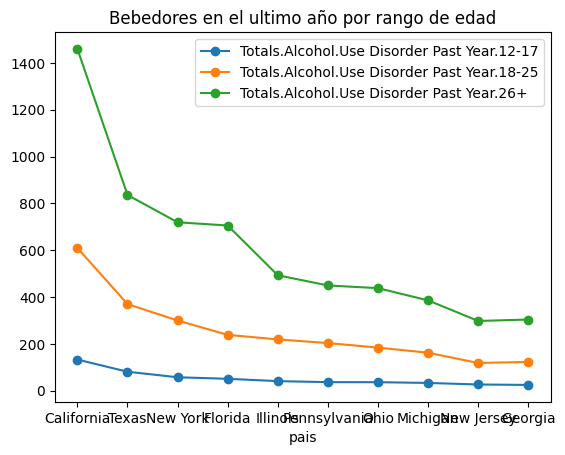

In [ ]:
# Graficar las tres columnas en un mismo gráfico
plt.plot(df_pais_10['Totals.Alcohol.Use Disorder Past Year.12-17'], label='Totals.Alcohol.Use Disorder Past Year.12-17', marker='o')
plt.plot(df_pais_10['Totals.Alcohol.Use Disorder Past Year.18-25'], label='Totals.Alcohol.Use Disorder Past Year.18-25', marker='o')
plt.plot(df_pais_10['Totals.Alcohol.Use Disorder Past Year.26+'], label='Totals.Alcohol.Use Disorder Past Year.26+', marker='o')

# Personalizar el gráfico
plt.xlabel('pais')
plt.title('Bebedores en el ultimo año por rango de edad')
plt.legend()

# Mostrar el gráfico
plt.show()

Vamos a elegir los 3 estados con mayor incidencia de casos y vamos a estudiar su evolucion a lo largo de los años.

California

Texas

New York

In [ ]:
df_California=df[df.State=='California']

df_California

,State,Year,Population.12-17,Population.18-25,Population.26+,Totals.Alcohol.Use Disorder Past Year.12-17,Totals.Alcohol.Use Disorder Past Year.18-25,Totals.Alcohol.Use Disorder Past Year.26+,"Rates,Alcohol,Use Disorder Past Year,12-17","Rates,Alcohol,Use Disorder Past Year,18-25",...,Totals.Marijuana.Used Past Year.26+,"Rates,Marijuana,Used Past Year,12-17","Rates,Marijuana,Used Past Year,18-25","Rates,Marijuana,Used Past Year,26+",Totals.Tobacco.Use Past Month.12-17,Totals.Tobacco.Use Past Month.18-25,Totals.Tobacco.Use Past Month.26+,"Rates,Tobacco,Use Past Month,12-17","Rates,Tobacco,Use Past Month,18-25","Rates,Tobacco,Use Past Month,26+"
4,California,2002,3140739,3919577,21392421,173,581,1298,0.055109,0.148312,...,1670,"0,141067","0,282887","0,078068",290,1377,4721,"0,092235","0,351353","0,220699"
55,California,2003,3209345,3949889,21686129,204,655,1336,0.063632,0.165861,...,1625,"0,146025","0,278214","0,074923",349,1380,4238,"0,10876","0,349357","0,195433"
106,California,2004,3290671,3974135,21850567,200,665,1395,0.060806,0.167423,...,1762,"0,139219","0,277279","0,08063",358,1353,4459,"0,108731","0,340423","0,204054"
157,California,2005,3293484,4085207,22046720,182,710,1539,0.055341,0.173875,...,1736,"0,132474","0,284125","0,078748",313,1402,4944,"0,094911","0,343297","0,224262"
208,California,2006,3251070,4216574,22275311,186,717,1526,0.057343,0.170077,...,1726,"0,130271","0,279859","0,07748",286,1417,5099,"0,08812","0,336126","0,228918"
259,California,2007,3209102,4257978,22463775,179,714,1389,0.055925,0.167796,...,1782,"0,13245","0,294413","0,079338",269,1410,5074,"0,083681","0,331231","0,225877"
310,California,2008,3147890,4329856,22568441,166,709,1492,0.052708,0.163641,...,2010,"0,151175","0,321473","0,089062",298,1488,5063,"0,094674","0,343718","0,224347"
361,California,2009,3101979,4325900,22773074,167,689,1566,0.053891,0.159286,...,2234,"0,15884","0,328703","0,098088",281,1468,4813,"0,090573","0,339314","0,211328"
412,California,2010,3195149,4379387,23321879,172,705,1432,0.053704,0.161070,...,2345,"0,170696","0,326336","0,100568",245,1411,4391,"0,076829","0,322235","0,188273"
463,California,2011,3156459,4427350,23658234,133,685,1401,0.042105,0.154648,...,2387,"0,161372","0,335","0,100879",207,1377,4479,"0,065641","0,310993","0,189302"


In [ ]:
df_Texas=df[df.State=='Texas']

df_Texas

,State,Year,Population.12-17,Population.18-25,Population.26+,Totals.Alcohol.Use Disorder Past Year.12-17,Totals.Alcohol.Use Disorder Past Year.18-25,Totals.Alcohol.Use Disorder Past Year.26+,"Rates,Alcohol,Use Disorder Past Year,12-17","Rates,Alcohol,Use Disorder Past Year,18-25",...,Totals.Marijuana.Used Past Year.26+,"Rates,Marijuana,Used Past Year,12-17","Rates,Marijuana,Used Past Year,18-25","Rates,Marijuana,Used Past Year,26+",Totals.Tobacco.Use Past Month.12-17,Totals.Tobacco.Use Past Month.18-25,Totals.Tobacco.Use Past Month.26+,"Rates,Tobacco,Use Past Month,12-17","Rates,Tobacco,Use Past Month,18-25","Rates,Tobacco,Use Past Month,26+"
43,Texas,2002,2018953,2512206,12788834,118,422,780,0.058449,0.167846,...,641,"0,139097","0,222794","0,050138",272,1067,3801,"0,134548","0,424743","0,297251"
94,Texas,2003,2038642,2577160,12992311,113,405,774,0.055423,0.157064,...,664,"0,133265","0,216891","0,051079",264,1081,3967,"0,129632","0,419642","0,305341"
145,Texas,2004,2052845,2628020,13267576,108,428,851,0.052479,0.162777,...,700,"0,121975","0,222714","0,052771",243,1108,3992,"0,118151","0,421485","0,300891"
196,Texas,2005,2083455,2674678,13620520,104,429,926,0.049852,0.160544,...,705,"0,11613","0,222424","0,051736",243,1133,4238,"0,116729","0,423707","0,311139"
247,Texas,2006,2105817,2699382,13969152,105,398,856,0.050082,0.147320,...,693,"0,112224","0,20514","0,049589",239,1078,4201,"0,113259","0,39923","0,300769"
298,Texas,2007,2107904,2702238,14256754,103,402,810,0.048697,0.148642,...,698,"0,110042","0,201613","0,048969",222,1049,4020,"0,105207","0,388092","0,281951"
349,Texas,2008,2113980,2737418,14523007,98,404,850,0.046258,0.147576,...,769,"0,112409","0,220299","0,052926",212,1050,3981,"0,1001","0,383627","0,274116"
400,Texas,2009,2125058,2813275,14745138,97,415,849,0.045767,0.147425,...,875,"0,12379","0,23834","0,059318",210,1079,3897,"0,099051","0,38353","0,264286"
451,Texas,2010,2243713,2871691,15188973,85,417,815,0.037976,0.145256,...,890,"0,121639","0,242857","0,05858",198,1063,3907,"0,088411","0,37028","0,25724"
502,Texas,2011,2265694,2919940,15484139,80,414,852,0.035108,0.141769,...,930,"0,123321","0,246441","0,060075",183,1043,3826,"0,080895","0,357214","0,247106"


In [ ]:
df_NewYork=df[df.State=='New York']

df_NewYork

,State,Year,Population.12-17,Population.18-25,Population.26+,Totals.Alcohol.Use Disorder Past Year.12-17,Totals.Alcohol.Use Disorder Past Year.18-25,Totals.Alcohol.Use Disorder Past Year.26+,"Rates,Alcohol,Use Disorder Past Year,12-17","Rates,Alcohol,Use Disorder Past Year,18-25",...,Totals.Marijuana.Used Past Year.26+,"Rates,Marijuana,Used Past Year,12-17","Rates,Marijuana,Used Past Year,18-25","Rates,Marijuana,Used Past Year,26+",Totals.Tobacco.Use Past Month.12-17,Totals.Tobacco.Use Past Month.18-25,Totals.Tobacco.Use Past Month.26+,"Rates,Tobacco,Use Past Month,12-17","Rates,Tobacco,Use Past Month,18-25","Rates,Tobacco,Use Past Month,26+"
32,New York,2002,1562426,2036478,12316861,87,323,727,0.055929,0.158409,...,1010,"0,159821","0,335951","0,082012",200,889,3498,"0,127821","0,436408","0,283994"
83,New York,2003,1571709,2047533,12344264,86,323,661,0.054891,0.157617,...,970,"0,149474","0,330986","0,078614",196,881,3379,"0,124926","0,430314","0,273728"
134,New York,2004,1584677,2050011,12371557,85,348,671,0.053770,0.169526,...,1022,"0,146465","0,323397","0,082578",202,882,3342,"0,127407","0,430356","0,270107"
185,New York,2005,1587906,2106543,12383739,84,352,689,0.052898,0.166938,...,1048,"0,145806","0,319449","0,084601",189,878,3333,"0,119163","0,416882","0,269183"
236,New York,2006,1579916,2179143,12397704,74,342,663,0.046523,0.157062,...,986,"0,139329","0,316844","0,079539",163,829,3120,"0,103486","0,380524","0,251657"
287,New York,2007,1559314,2218415,12500501,74,377,702,0.047594,0.170141,...,940,"0,142539","0,323362","0,075191",163,852,2959,"0,104421","0,384183","0,236729"
338,New York,2008,1535172,2262614,12574826,82,410,799,0.053117,0.180997,...,1048,"0,148748","0,363572","0,083372",165,885,2972,"0,10734","0,391349","0,236351"
389,New York,2009,1509858,2236966,12648267,75,371,758,0.049692,0.165970,...,1142,"0,1432","0,345613","0,090304",151,815,3004,"0,099776","0,364223","0,237529"
440,New York,2010,1497645,2236959,12651349,62,318,716,0.041565,0.141940,...,1111,"0,138225","0,31857","0,087814",133,777,3053,"0,088726","0,347377","0,241336"
491,New York,2011,1474700,2242476,12760358,53,292,735,0.036089,0.130300,...,1239,"0,138592","0,348735","0,097117",117,797,3060,"0,079541","0,355343","0,239825"


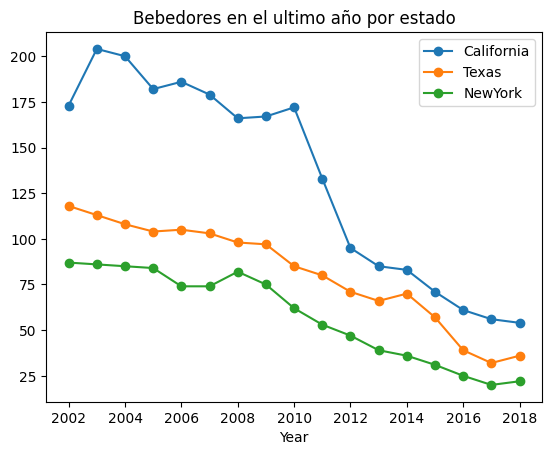

In [ ]:
plt.plot(df_California.Year,df_California['Totals.Alcohol.Use Disorder Past Year.12-17'], label='California', marker='o')
plt.plot(df_Texas.Year,df_Texas['Totals.Alcohol.Use Disorder Past Year.12-17'], label='Texas', marker='o')
plt.plot(df_Texas.Year,df_NewYork['Totals.Alcohol.Use Disorder Past Year.12-17'], label='NewYork', marker='o')

# Personalizar el gráfico
plt.xlabel('Year')
plt.title('Bebedores en el ultimo año por estado')
plt.legend()

# Mostrar el gráfico
plt.show()

#Modelo Regresión lineal
Vamos a utilizar el modelo de regresión lineal para predecir el estimado de consumidores de alcohol en el último año en relación a la variable target Año en el estado con mayor indice de consumidores en el último año, California.


In [ ]:
df.head()

,State,Year,Population.12-17,Population.18-25,Population.26+,Totals.Alcohol.Use Disorder Past Year.12-17,Totals.Alcohol.Use Disorder Past Year.18-25,Totals.Alcohol.Use Disorder Past Year.26+,"Rates,Alcohol,Use Disorder Past Year,12-17","Rates,Alcohol,Use Disorder Past Year,18-25",...,Totals.Marijuana.Used Past Year.26+,"Rates,Marijuana,Used Past Year,12-17","Rates,Marijuana,Used Past Year,18-25","Rates,Marijuana,Used Past Year,26+",Totals.Tobacco.Use Past Month.12-17,Totals.Tobacco.Use Past Month.18-25,Totals.Tobacco.Use Past Month.26+,"Rates,Tobacco,Use Past Month,12-17","Rates,Tobacco,Use Past Month,18-25","Rates,Tobacco,Use Past Month,26+"
0,Alabama,2002,380805,499453,2812905,18,68,138,0.048336,0.136490,...,141,"0,127535","0,23788","0,050275",63,226,930,"0,166578","0,451976","0,330659"
1,Alaska,2002,69400,62791,368460,4,12,27,0.061479,0.187891,...,46,"0,18873","0,389026","0,124566",11,30,112,"0,163918","0,48427","0,30422"
2,Arizona,2002,485521,602265,3329482,36,117,258,0.073819,0.193626,...,215,"0,169646","0,275435","0,06464",73,240,1032,"0,151071","0,397968","0,309969"
3,Arkansas,2002,232986,302029,1687337,14,53,101,0.061457,0.175913,...,104,"0,157567","0,288856","0,06151",46,169,660,"0,195714","0,558846","0,39121"
4,California,2002,3140739,3919577,21392421,173,581,1298,0.055109,0.148312,...,1670,"0,141067","0,282887","0,078068",290,1377,4721,"0,092235","0,351353","0,220699"


In [ ]:
X=df.drop(["Year","State","Population.12-17","Population.18-25","Population.26+"],axis=1)
y=df.Year
X.head()

,Totals.Alcohol.Use Disorder Past Year.12-17,Totals.Alcohol.Use Disorder Past Year.18-25,Totals.Alcohol.Use Disorder Past Year.26+,"Rates,Alcohol,Use Disorder Past Year,12-17","Rates,Alcohol,Use Disorder Past Year,18-25","Rates,Alcohol,Use Disorder Past Year,26+",Totals.Alcohol.Use Past Month.12-17,Totals.Alcohol.Use Past Month.18-25,Totals.Alcohol.Use Past Month.26+,"Rates,Alcohol,Use Past Month,12-17",...,Totals.Marijuana.Used Past Year.26+,"Rates,Marijuana,Used Past Year,12-17","Rates,Marijuana,Used Past Year,18-25","Rates,Marijuana,Used Past Year,26+",Totals.Tobacco.Use Past Month.12-17,Totals.Tobacco.Use Past Month.18-25,Totals.Tobacco.Use Past Month.26+,"Rates,Tobacco,Use Past Month,12-17","Rates,Tobacco,Use Past Month,18-25","Rates,Tobacco,Use Past Month,26+"
0,18,68,138,0.048336,0.136490,0.049068,57,254,1048,0.150033,...,141,"0,127535","0,23788","0,050275",63,226,930,"0,166578","0,451976","0,330659"
1,4,12,27,0.061479,0.187891,0.073677,11,38,206,0.158988,...,46,"0,18873","0,389026","0,124566",11,30,112,"0,163918","0,48427","0,30422"
2,36,117,258,0.073819,0.193626,0.077521,91,352,1774,0.186864,...,215,"0,169646","0,275435","0,06464",73,240,1032,"0,151071","0,397968","0,309969"
3,14,53,101,0.061457,0.175913,0.059810,39,162,664,0.167065,...,104,"0,157567","0,288856","0,06151",46,169,660,"0,195714","0,558846","0,39121"
4,173,581,1298,0.055109,0.148312,0.060692,480,2176,11847,0.152791,...,1670,"0,141067","0,282887","0,078068",290,1377,4721,"0,092235","0,351353","0,220699"


previamente voy a modificar todos los campos tipo objeto y los voy a convertir en numeros float

In [ ]:
df.dtypes

State                                                 object
Year                                                   int64
Population.12-17                                       int64
Population.18-25                                       int64
Population.26+                                         int64
Totals.Alcohol.Use Disorder Past Year.12-17            int64
Totals.Alcohol.Use Disorder Past Year.18-25            int64
Totals.Alcohol.Use Disorder Past Year.26+              int64
Rates,Alcohol,Use Disorder Past Year,12-17           float64
Rates,Alcohol,Use Disorder Past Year,18-25           float64
Rates,Alcohol,Use Disorder Past Year,26+             float64
Totals.Alcohol.Use Past Month.12-17                    int64
Totals.Alcohol.Use Past Month.18-25                    int64
Totals.Alcohol.Use Past Month.26+                      int64
Rates,Alcohol,Use Past Month,12-17                   float64
Rates,Alcohol,Use Past Month,18-25                   float64
Rates,Alcohol,Use Past M

In [ ]:
df['Rates,Tobacco,Cigarette Past Month,12-17']=df['Rates,Tobacco,Cigarette Past Month,12-17'].str.replace(',','.')
df['Rates,Tobacco,Cigarette Past Month,18-25']=df['Rates,Tobacco,Cigarette Past Month,18-25'].str.replace(',','.')
df['Rates,Tobacco,Cigarette Past Month,26+']=df['Rates,Tobacco,Cigarette Past Month,26+'].str.replace(',','.')
df['Rates,Illicit Drugs,Cocaine Used Past Year,12-17']=df['Rates,Illicit Drugs,Cocaine Used Past Year,12-17'].str.replace(',','.')
df['Rates,Illicit Drugs,Cocaine Used Past Year,18-25']=df['Rates,Illicit Drugs,Cocaine Used Past Year,18-25'].str.replace(',','.')
df['Rates,Illicit Drugs,Cocaine Used Past Year,26+']=df['Rates,Illicit Drugs,Cocaine Used Past Year,26+'].str.replace(',','.')
df['Rates,Marijuana,New Users,12-17']=df['Rates,Marijuana,New Users,12-17'].str.replace(',','.')
df['Rates,Marijuana,New Users,18-25']=df['Rates,Marijuana,New Users,18-25'].str.replace(',','.')
df['Rates,Marijuana,New Users,26+']=df['Rates,Marijuana,New Users,26+'].str.replace(',','.')
df['Rates,Marijuana,Used Past Year,12-17']=df['Rates,Marijuana,Used Past Year,12-17'].str.replace(',','.')
df['Rates,Marijuana,Used Past Year,18-25']=df['Rates,Marijuana,Used Past Year,18-25'].str.replace(',','.')
df['Rates,Marijuana,Used Past Year,26+']=df['Rates,Marijuana,Used Past Year,26+'].str.replace(',','.')
df['Rates,Tobacco,Use Past Month,12-17']=df['Rates,Tobacco,Use Past Month,12-17'].str.replace(',','.')
df['Rates,Tobacco,Use Past Month,18-25']=df['Rates,Tobacco,Use Past Month,18-25'].str.replace(',','.')
df['Rates,Tobacco,Use Past Month,26+']=df['Rates,Tobacco,Use Past Month,26+'].str.replace(',','.')


In [ ]:
df['Rates,Marijuana,Used Past Month,12-17']=df['Rates,Marijuana,Used Past Month,12-17'].str.replace(',','.')
df['Rates,Marijuana,Used Past Month,18-25']=df['Rates,Marijuana,Used Past Month,18-25'].str.replace(',','.')
df['Rates,Marijuana,Used Past Month,26+']=df['Rates,Marijuana,Used Past Month,26+'].str.replace(',','.')

In [ ]:
df['Rates,Tobacco,Cigarette Past Month,12-17']=df['Rates,Tobacco,Cigarette Past Month,12-17'].astype(float)
df['Rates,Tobacco,Cigarette Past Month,18-25']=df['Rates,Tobacco,Cigarette Past Month,18-25'].astype(float)
df['Rates,Tobacco,Cigarette Past Month,26+']=df['Rates,Tobacco,Cigarette Past Month,26+'].astype(float)
df['Rates,Illicit Drugs,Cocaine Used Past Year,12-17']=df['Rates,Illicit Drugs,Cocaine Used Past Year,12-17'].astype(float)
df['Rates,Illicit Drugs,Cocaine Used Past Year,18-25']=df['Rates,Illicit Drugs,Cocaine Used Past Year,18-25'].astype(float)
df['Rates,Illicit Drugs,Cocaine Used Past Year,26+']=df['Rates,Illicit Drugs,Cocaine Used Past Year,26+'].astype(float)
df['Rates,Marijuana,New Users,12-17']=df['Rates,Marijuana,New Users,12-17'].astype(float)
df['Rates,Marijuana,New Users,18-25']=df['Rates,Marijuana,New Users,18-25'].astype(float)
df['Rates,Marijuana,New Users,26+']=df['Rates,Marijuana,New Users,26+'].astype(float)
df['Rates,Marijuana,Used Past Year,12-17']=df['Rates,Marijuana,Used Past Year,12-17'].astype(float)
df['Rates,Marijuana,Used Past Year,18-25']=df['Rates,Marijuana,Used Past Year,18-25'].astype(float)
df['Rates,Marijuana,Used Past Year,26+']=df['Rates,Marijuana,Used Past Year,26+'].astype(float)
df['Rates,Tobacco,Use Past Month,12-17']=df['Rates,Tobacco,Use Past Month,12-17'].astype(float)
df['Rates,Tobacco,Use Past Month,18-25']=df['Rates,Tobacco,Use Past Month,18-25'].astype(float)
df['Rates,Tobacco,Use Past Month,26+']=df['Rates,Tobacco,Use Past Month,26+'].astype(float)

In [ ]:
df['Rates,Marijuana,Used Past Month,12-17']=df['Rates,Marijuana,Used Past Month,12-17'].astype(float)
df['Rates,Marijuana,Used Past Month,18-25']=df['Rates,Marijuana,Used Past Month,18-25'].astype(float)
df['Rates,Marijuana,Used Past Month,26+']=df['Rates,Marijuana,Used Past Month,26+'].astype(float)

In [ ]:
df.dtypes

State                                                 object
Year                                                   int64
Population.12-17                                       int64
Population.18-25                                       int64
Population.26+                                         int64
Totals.Alcohol.Use Disorder Past Year.12-17            int64
Totals.Alcohol.Use Disorder Past Year.18-25            int64
Totals.Alcohol.Use Disorder Past Year.26+              int64
Rates,Alcohol,Use Disorder Past Year,12-17           float64
Rates,Alcohol,Use Disorder Past Year,18-25           float64
Rates,Alcohol,Use Disorder Past Year,26+             float64
Totals.Alcohol.Use Past Month.12-17                    int64
Totals.Alcohol.Use Past Month.18-25                    int64
Totals.Alcohol.Use Past Month.26+                      int64
Rates,Alcohol,Use Past Month,12-17                   float64
Rates,Alcohol,Use Past Month,18-25                   float64
Rates,Alcohol,Use Past M

Vamos a generar un modelo para predecir el indice de consumidores de alcohol en el ultimo año menores de 17 años en relacion a todas las variables menos el estado.

In [ ]:
X=df.drop(["Totals.Alcohol.Use Disorder Past Year.12-17","State"],axis=1)
y=df['Totals.Alcohol.Use Disorder Past Year.12-17']
X.head()

,Year,Population.12-17,Population.18-25,Population.26+,Totals.Alcohol.Use Disorder Past Year.18-25,Totals.Alcohol.Use Disorder Past Year.26+,"Rates,Alcohol,Use Disorder Past Year,12-17","Rates,Alcohol,Use Disorder Past Year,18-25","Rates,Alcohol,Use Disorder Past Year,26+",Totals.Alcohol.Use Past Month.12-17,...,Totals.Marijuana.Used Past Year.26+,"Rates,Marijuana,Used Past Year,12-17","Rates,Marijuana,Used Past Year,18-25","Rates,Marijuana,Used Past Year,26+",Totals.Tobacco.Use Past Month.12-17,Totals.Tobacco.Use Past Month.18-25,Totals.Tobacco.Use Past Month.26+,"Rates,Tobacco,Use Past Month,12-17","Rates,Tobacco,Use Past Month,18-25","Rates,Tobacco,Use Past Month,26+"
0,2002,380805,499453,2812905,68,138,0.048336,0.136490,0.049068,57,...,141,0.127535,0.237880,0.050275,63,226,930,0.166578,0.451976,0.330659
1,2002,69400,62791,368460,12,27,0.061479,0.187891,0.073677,11,...,46,0.188730,0.389026,0.124566,11,30,112,0.163918,0.484270,0.304220
2,2002,485521,602265,3329482,117,258,0.073819,0.193626,0.077521,91,...,215,0.169646,0.275435,0.064640,73,240,1032,0.151071,0.397968,0.309969
3,2002,232986,302029,1687337,53,101,0.061457,0.175913,0.059810,39,...,104,0.157567,0.288856,0.061510,46,169,660,0.195714,0.558846,0.391210
4,2002,3140739,3919577,21392421,581,1298,0.055109,0.148312,0.060692,480,...,1670,0.141067,0.282887,0.078068,290,1377,4721,0.092235,0.351353,0.220699


In [ ]:
# Sequential Forward Selection(sfs)
sfs = SFS(LR(),k_features=3)

In [ ]:
sfs.fit(X, y)
sfs.k_feature_names_

('Rates,Alcohol,Use Past Month,26+',
 'Totals.Illicit Drugs.Cocaine Used Past Year.12-17',
 'Totals.Tobacco.Use Past Month.12-17')

In [ ]:
X=X[['Rates,Alcohol,Use Past Month,26+','Totals.Illicit Drugs.Cocaine Used Past Year.12-17','Totals.Tobacco.Use Past Month.12-17']]

In [ ]:
X.head()

,"Rates,Alcohol,Use Past Month,26+",Totals.Illicit Drugs.Cocaine Used Past Year.12-17,Totals.Tobacco.Use Past Month.12-17
0,0.372703,6,63
1,0.559151,2,11
2,0.532858,16,73
3,0.393372,4,46
4,0.553801,53,290


In [ ]:
modelo=LR()
modelo.fit(X,y)

LinearRegression()

In [ ]:
y_preds=modelo.predict(X)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_preds, y)

0.9623691769826777


Vamos a agregar a las variables de estudio el estado, que vamos a convertir en una variable numerica

In [ ]:
X=df.drop(["Totals.Alcohol.Use Disorder Past Year.12-17"],axis=1)
X=pd.get_dummies(X)
y=df['Totals.Alcohol.Use Disorder Past Year.12-17']
X.head()

,Year,Population.12-17,Population.18-25,Population.26+,Totals.Alcohol.Use Disorder Past Year.18-25,Totals.Alcohol.Use Disorder Past Year.26+,"Rates,Alcohol,Use Disorder Past Year,12-17","Rates,Alcohol,Use Disorder Past Year,18-25","Rates,Alcohol,Use Disorder Past Year,26+",Totals.Alcohol.Use Past Month.12-17,...,State_South Dakota,State_Tennessee,State_Texas,State_Utah,State_Vermont,State_Virginia,State_Washington,State_West Virginia,State_Wisconsin,State_Wyoming
0,2002,380805,499453,2812905,68,138,0.048336,0.136490,0.049068,57,...,0,0,0,0,0,0,0,0,0,0
1,2002,69400,62791,368460,12,27,0.061479,0.187891,0.073677,11,...,0,0,0,0,0,0,0,0,0,0
2,2002,485521,602265,3329482,117,258,0.073819,0.193626,0.077521,91,...,0,0,0,0,0,0,0,0,0,0
3,2002,232986,302029,1687337,53,101,0.061457,0.175913,0.059810,39,...,0,0,0,0,0,0,0,0,0,0
4,2002,3140739,3919577,21392421,581,1298,0.055109,0.148312,0.060692,480,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Sequential Forward Selection(sfs)
sfs = SFS(LR(),k_features=3)

In [ ]:
sfs.fit(X, y)
sfs.k_feature_names_

('Rates,Alcohol,Use Past Month,26+',
 'Totals.Illicit Drugs.Cocaine Used Past Year.12-17',
 'Totals.Tobacco.Use Past Month.12-17')

In [ ]:
X=X[['Rates,Alcohol,Use Past Month,26+','Totals.Illicit Drugs.Cocaine Used Past Year.12-17','Totals.Tobacco.Use Past Month.12-17']]

In [ ]:
X.head()

,"Rates,Alcohol,Use Past Month,26+",Totals.Illicit Drugs.Cocaine Used Past Year.12-17,Totals.Tobacco.Use Past Month.12-17
0,0.372703,6,63
1,0.559151,2,11
2,0.532858,16,73
3,0.393372,4,46
4,0.553801,53,290


In [ ]:
modelo=LR()
modelo.fit(X,y)

LinearRegression()

In [ ]:
y_preds=modelo.predict(X)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_preds, y)

0.9623691769826777

No cambia nada